In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import numpy as np
import requests
import yfinance as yf
import datetime 
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

---

### Find your own Stock in the US market and Taiwan, download CSV to play In https://finance.yahoo.com/quote/CSV/history?period1=1428768000&period2=1554998400&interval=1d&filter=history&frequency=1d

In [2]:
# 數據從2010-06-29 到 2021-04-20，資料筆數共2721筆
TSLAdf = yf.download("TSLA", start="2010-06-29", end="2021-04-20",group_by="ticker")

[*********************100%***********************]  1 of 1 completed


---

### Create a new column using List Comprehension - Direction

In [3]:
Tesla = TSLAdf

In [4]:
Tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44652800
2021-04-14,770.700012,780.789978,728.030029,732.229980,732.229980,49017400
2021-04-15,743.099976,743.690002,721.309998,738.849976,738.849976,27848900


In [5]:
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2720.000000,2720.000000,2720.000000,2720.000000,2720.000000,2.720000e+03
mean,79.179181,80.922657,77.245340,79.218189,79.218189,3.186235e+07
std,144.675867,148.043636,140.637267,144.732708,144.732708,2.898633e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.656500,7.795500,7.530000,7.658500,7.658500,1.168250e+07
50%,45.011000,45.743000,44.211000,44.967999,44.967999,2.526750e+07
75%,62.398499,63.282001,61.143002,62.251000,62.251000,4.108568e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [6]:
Tesla['price1'] = Tesla['Close'].shift(-1)

In [7]:
# 價格差異
Tesla['PriceDiff'] = Tesla['price1'] - Tesla['Close']

In [8]:
# 每日收益
Tesla['Return'] = Tesla['PriceDiff' ] / Tesla['Close']

In [9]:
# Creat Direction
Tesla['Direction'] = [1 if Tesla.loc[ei, 'PriceDiff'] > 0 else -1
                    for ei in Tesla.index]

In [10]:
# Create a "Moving average"column
Tesla['Average3'] = (Tesla['Close'] + Tesla['Close'].shift(1) + Tesla['Close'].shift(2)) / 3

---

### Create a new column using Rolling Window Calculation - Any days of Moving Average. [10, 20, 60] to do the trading strategy and see the performance and maximum your profits

In [11]:
# In DataFrame, rolling() is a method to compute moving average over any number of days.
Tesla['MA10'] = Tesla['Close'].rolling(10).mean()
Tesla['MA20'] = Tesla['Close'].rolling(20).mean()
Tesla['MA60'] = Tesla['Close'].rolling(60).mean()

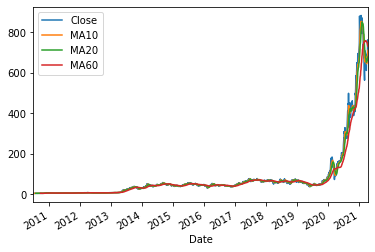

In [12]:
Tesla['Close'].plot(legend=True)
Tesla['MA10'].plot(legend=True)
Tesla['MA20'].plot(legend=True)
Tesla['MA60'].plot(legend=True)

Total money you win is  777.8860261440277
Total money you spent is  4.7779998779296875


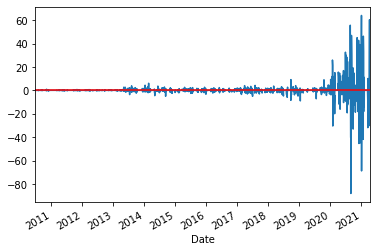

In [13]:
# 交易策略10 - 20
Tesla['Shares10-20'] = [1 if Tesla.loc[ei, 'MA10'] > Tesla.loc[ei, 'MA20'] else 0 
                for ei in Tesla.index]

Tesla['Profit10-20'] = [Tesla.loc[ei, 'price1'] - Tesla.loc[ei, 'Close']
                if Tesla.loc[ei, 'Shares10-20'] == 1
                else 0 for ei in Tesla.index]
Tesla['Profit10-20'].plot()
plt.axhline(y=0, color='red')

Tesla['wealth10-20'] = Tesla['Profit10-20'].cumsum()
Tesla.tail()

print('Total money you win is ', Tesla.loc[Tesla.index[-2], 'wealth10-20'])
print('Total money you spent is ', Tesla.loc[Tesla.index[0], 'Close'])

Total money you win is  552.2419791221619
Total money you spent is  4.7779998779296875


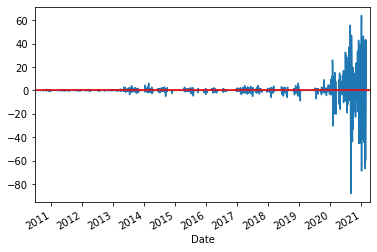

In [14]:
# 交易策略10 - 60
Tesla['Shares10-60'] = [1 if Tesla.loc[ei, 'MA10'] > Tesla.loc[ei, 'MA60'] else 0 
                for ei in Tesla.index]

Tesla['Profit10-60'] = [Tesla.loc[ei, 'price1'] - Tesla.loc[ei, 'Close']
                if Tesla.loc[ei, 'Shares10-60'] == 1
                else 0 for ei in Tesla.index]
Tesla['Profit10-60'].plot()
plt.axhline(y=0, color='red')

Tesla['wealth10-60'] = Tesla['Profit10-60'].cumsum()
Tesla.tail()

print('Total money you win is ', Tesla.loc[Tesla.index[-2], 'wealth10-60'])
print('Total money you spent is ', Tesla.loc[Tesla.index[0], 'Close'])

---

### Apply the concept of probability to measure the probability that the stock price drops a certain percentage in a day, and in a year. [+- 5%, 10%]

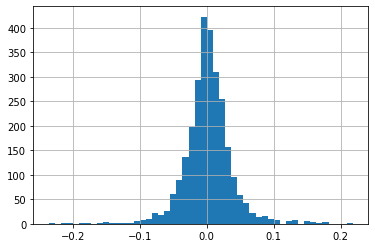

In [15]:
Tesla['LogReturn'] = np.log(Tesla['Close']).shift(-1) - np.log(Tesla['Close'])
Tesla['LogReturn'].hist(bins=50)

In [16]:
mu = Tesla['LogReturn'].mean()
sigma = Tesla['LogReturn'].std(ddof=1)
print(mu, sigma)

0.0018417590694055448 0.035584650062297545


In [17]:
print('The probability of rise over 5% in 1 day is')
print(norm.cdf(0.05, mu, sigma))
print("\n")
print('The probability of droppong over 5% in 1 day is')
print(norm.cdf(-0.05, mu, sigma))
print("\n")
print('The probability of rise over 10% in 1 day is')
print(norm.cdf(0.10, mu, sigma))
print("\n")
print('The probability of droppong over 10% in 1 day is')
print(norm.cdf(-0.10, mu, sigma))

The probability of rise over 5% in 1 day is
0.9120269783118072


The probability of droppong over 5% in 1 day is
0.07257788027716972


The probability of rise over 10% in 1 day is
0.9970961313726888


The probability of droppong over 10% in 1 day is
0.002105166255008993


In [18]:
mu220 = 220*mu
sigma220 = 220**0.5*sigma
print(mu220, sigma220)

0.40518699526921986 0.5278056559116793


In [19]:
print('The probability of rise over 5% in 1 day is')
print(norm.cdf(0.05, mu220, sigma220))
print("\n")
print('The probability of droppong over 5% in 1 day is')
print(norm.cdf(-0.05, mu220, sigma220))
print("\n")
print('The probability of rise over 10% in 1 day is')
print(norm.cdf(0.10, mu220, sigma220))
print("\n")
print('The probability of droppong over 10% in 1 day is')
print(norm.cdf(-0.10, mu220, sigma220))

The probability of rise over 5% in 1 day is
0.2504894425560158


The probability of droppong over 5% in 1 day is
0.1942298652676584


The probability of rise over 10% in 1 day is
0.28155830469864573


The probability of droppong over 10% in 1 day is
0.16924682104821703


---

### Calculate the value at risk (VaR) for Single day value at risk for 10%

In [20]:
# 險價值10％
norm.ppf(0.1,mu,sigma)

-0.043761804927288636

---

### Practice the code of estimating the average stock return with a certain confidence level (95%)

In [21]:
z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)
Tesla_mean = Tesla['LogReturn'].mean()
Tesla_std = Tesla['LogReturn'].std(ddof=1)/(Tesla.shape[0])**0.5

interval_left = Tesla_mean + z_left * Tesla_std
interval_right = Tesla_mean + z_right * Tesla_std
print("Tesla Mean is", Tesla_mean)
print("----------------------------------------------------------------------")
print("95 confidence interval is")
print(interval_left, interval_right)

Tesla Mean is 0.0018417590694055448
----------------------------------------------------------------------
95 confidence interval is
0.0005044667867463866 0.0031790513520647025


---

### Hypothesis Testing : the average daily return of your stock is 0 or not, base on the years of historical data available.(Explain your result)

In [22]:
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
n = 2720 
zhat = (Tesla_mean-0)/(Tesla_std/n**0.5)
print("zhat："+str(zhat))
print(zleft, zright)
print('At the significance level if：', alpha)
print('Shall we reject?：', zhat > zright or zhat <zright)

zhat：140.77937144282362
-1.9599639845400545 1.9599639845400545
At the significance level if： 0.05
Shall we reject?： True


## Tesla的股票的平均日收益率是否為0，根據上面結果<br>我們拒絕H<sub>0</sub>:  μ=0<br>我們接受H<sub>0</sub>:  μ≠0<br>因此  得出Tesla的股票的平均日收益不為0